In [247]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [248]:
Data = pd.read_csv('./Titanic-Dataset.csv')

In [249]:
Data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [250]:
Data = Data.replace([np.inf, -np.inf], np.nan).fillna(99999)

In [251]:
Data = Data.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

In [252]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,19888.920505,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,39908.790109,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,99999.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

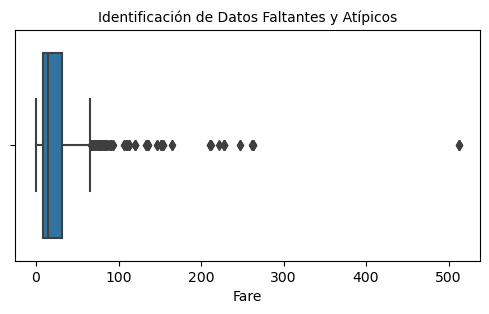

In [253]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [254]:
print("Cantidad de Registros con cero en Identificación el pasajero (PassengerId): ",Data['PassengerId'].isin([0]).sum())
print("Cantidad de Registros con cero en Clase a la que pertenecía el pasajero (Pclass): ",Data['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad (Age): ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de hermanos, hermanas, hermanastros o hermanastras en el barco (SibSp): ",Data['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de padres e hijos en el barco (Parch): ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio pagado por el billete (Fare): ",Data['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Identificación el pasajero (PassengerId):  0
Cantidad de Registros con cero en Clase a la que pertenecía el pasajero (Pclass):  0
Cantidad de Registros con cero en Edad (Age):  0
Cantidad de Registros con cero en Número de hermanos, hermanas, hermanastros o hermanastras en el barco (SibSp):  608
Cantidad de Registros con cero en Número de padres e hijos en el barco (Parch):  678
Cantidad de Registros con cero en Precio pagado por el billete (Fare):  15


In [255]:
Data['SibSp']=Data['SibSp'].replace(0,Data['SibSp'].mean())
Data['Parch']=Data['Parch'].replace(0,Data['Parch'].mean())
Data['Fare']=Data['Fare'].replace(0,Data['Fare'].mean())

In [256]:
print("Cantidad de Registros con cero en Número de hermanos, hermanas, hermanastros o hermanastras en el barco (SibSp): ",Data['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de padres e hijos en el barco (Parch): ",Data['Parch'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio pagado por el billete (Fare): ",Data['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Número de hermanos, hermanas, hermanastros o hermanastras en el barco (SibSp):  0
Cantidad de Registros con cero en Número de padres e hijos en el barco (Parch):  0
Cantidad de Registros con cero en Precio pagado por el billete (Fare):  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

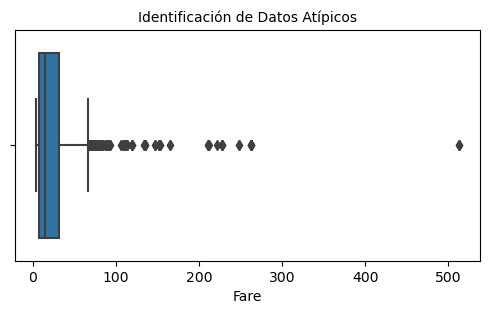

In [257]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [258]:
nivel_minimo=1
nivel_maximo=500
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 3


In [259]:
Data=Data[(Data['Fare']<nivel_maximo)&(Data['Fare']>nivel_minimo)]

In [260]:
Total_Atipicos=((Data['Fare']<nivel_minimo)|(Data['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [261]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Age          888 non-null    float64
 4   SibSp        888 non-null    float64
 5   Parch        888 non-null    float64
 6   Fare         888 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 55.5 KB


In [262]:
Data['Survived'].value_counts()

Survived
0    549
1    339
Name: count, dtype: int64

In [263]:
Data[['Survived']].head(25)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [452]:
X = Data.drop('Survived',axis=1)

Y = Data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state= 0)

In [453]:
print (X_train)

     PassengerId  Pclass      Age     SibSp     Parch       Fare
510          511       3     29.0  0.523008  0.381594   7.750000
832          833       3  99999.0  0.523008  0.381594   7.229200
815          816       1  99999.0  0.523008  0.381594  32.204208
717          718       2     27.0  0.523008  0.381594  10.500000
84            85       2     17.0  0.523008  0.381594  10.500000
..           ...     ...      ...       ...       ...        ...
131          132       3     20.0  0.523008  0.381594   7.050000
490          491       3  99999.0  1.000000  0.381594  19.966700
528          529       3     39.0  0.523008  0.381594   7.925000
48            49       3  99999.0  2.000000  0.381594  21.679200
80            81       3     22.0  0.523008  0.381594   9.000000

[710 rows x 6 columns]


In [454]:
print (Y_train)

510    1
832    0
815    0
717    1
84     1
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 710, dtype: int64


In [455]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   
ModeloPrediccion = modelo_regresion.predict(X_test)

In [456]:
print (Y_test)

153    0
752    0
610    0
200    0
311    1
      ..
96     0
430    1
75     0
575    0
143    0
Name: Survived, Length: 178, dtype: int64


In [457]:
print (ModeloPrediccion)

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0]


In [458]:
print(classification_report(Y_test,ModeloPrediccion))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       110
           1       0.65      0.29      0.40        68

    accuracy                           0.67       178
   macro avg       0.66      0.60      0.59       178
weighted avg       0.66      0.67      0.63       178



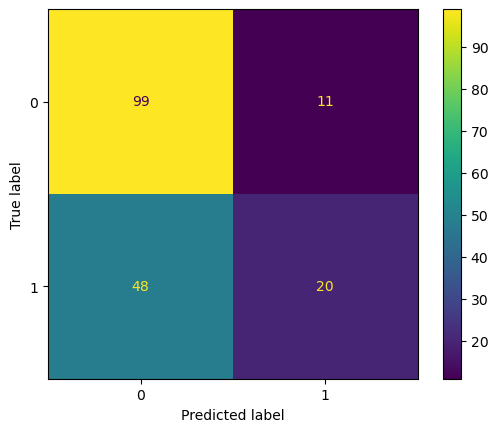

In [459]:
cm=confusion_matrix(Y_test,ModeloPrediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

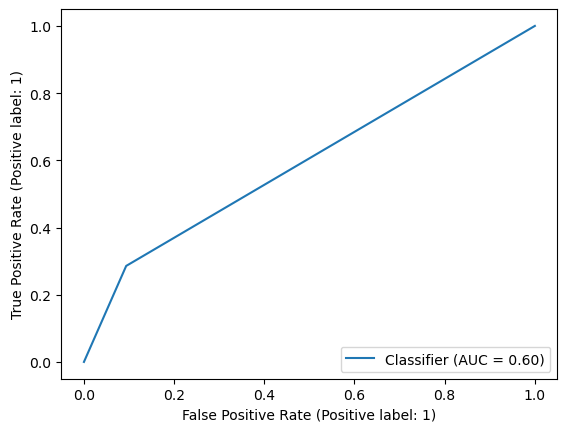

In [451]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, ModeloPrediccion)
plt.show()